In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('Sales_masked.csv')
# print(data.keys())
# data.isnull().sum().to_frame()
data.sort_values('DayKey', inplace=True)

data_np = data.to_numpy()
data_np

keep_le = []

def gen_GAC():
    gen_G =[]
    for i in range(1,11):
        gen_G.append('G'+str(i%11))
    gen_A =[]
    for i in range(1,7):
        gen_A.append('A'+str(i%7))
    gen_C =[]
    for i in range(1,3):
        gen_C.append('C'+str(i%3))

    string = []
    for i in range(10):
        for j in range(12):
            string.append(gen_G[i]+gen_A[j%6])
    sum =0
    count = 1
    for i in range(120):
        if sum < 6   :
            string[i] += 'C'+'1'
            sum +=1
        else :
            string[i] += 'C'+'2'
            sum +=1
            if sum == 12 :
                sum = 0
    return string
# หาindex 
def findrecode(product, area, chanel):
        row = 0
        pac = gen_GAC()
        for i in range(len(pac)):
            if len(pac[i]) > 6 :
                if pac[i][0:3] == product and pac[i][3:5] == area and pac[i][5:] == chanel: #แก้ตรงนี้
                    row = i
                    break
            else :
                if pac[i][0:2] == product and pac[i][2:4] == area and pac[i][4:] == chanel: #แก้ตรงนี้
                    row = i
                    break
        return row

sum=0
def transform_d(G,check=False,product=None,area=None,chanel=None):
    if check == False:
        global sum
        for i in range(4):
            le = LabelEncoder()
            keep_le.append(le)
            G[:, i] = keep_le[sum].fit_transform(G[:, i])
            sum += 1
    else:
        index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
        # print(index)
        for i in range(G.shape[1]-2):
            G[:,i] = keep_le[int(arr[index][i])].fit_transform(G[:,i])

# สำหรับอ้างอิงตำแหน่งใน keep_le
arr = np.zeros((120, 4))
xum = 0
for i in range(120):
    for j in range(4):
        arr[i][j] += xum
        xum += 1
        
# print(arr)

# #product group 1 Area 1 channel 1
def identifier(product, area, chanel):
    G = []
    for i in range(data_np.shape[0]):
        if data_np[i, 1] == product and data_np[i, 2] == area and data_np[i, 3] == chanel:
            G.append(data_np[i, :])
    G = np.array(G)
    # transform_d(G)  
    return G



In [2]:
# print(len(keep_le)) #เช็คตำนวน encode

# Good
def get_inverse(G,index):
    xx = []
    for i in range(G.shape[0]):
        xx.append(G[i,index])
    return xx

# not yet
def inverse_d(G,product, area, chanel):
    # print(product, area, chanel)
    index = findrecode(product, area, chanel) #หาข้อมูลตำแน่งที่ต้องการ จะเปลี่ยนว่าจะไป อยู่ในตัวใดจาก 120 ตัว
    # print(index)
    for i in range(G.shape[1]-2): # columns - 2 
        xx = get_inverse(G,i) # เอาข้อมูลจาก ฟังก์ชันมาแปลง กลับ เป็นตัวเดิม
        # print(xx)
        G[:,i] = keep_le[int(arr[index][i])].inverse_transform(xx)


In [3]:
#group Area chanel
All_Group = []
for dept in range(1,11):

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(1)))

    for row in range(1,7):
        for col in range(1):
            # print('G'+str(dept),'A'+str(row),'C'+str(2),end=' '+'\n')
            All_Group.append(identifier('G'+str(dept),'A'+str(row),'C'+str(2)))



In [4]:
# All_Group[2]
        


In [5]:

def gendate(final_day, start_day):
    old_year = int(start_day[0:4])
    recent_year = int(final_day[0:4])
    # print(old_year," ",recent_year)
    keep_y_m_d = []
    for y in range(old_year, recent_year+1):
        # print(y,end=''+'\n')
        for m in range(1, 13):
            # print(m,end=' '+'\n')
            if m == 1 or m == 3 or m == 5 or m == 7 or m == 8 or m == 10 or m == 12: #ลงท้ายด้วย คม
                for d in range(1, 32):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

            elif m == 2:
                if y == 2012 or y == 2016 or y == 2020 :     
                    for d in range(1, 30):
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
                else:
                    for d in range(1, 29):
                        # print(d,end=' ')
                        y_m_d = str(datetime.datetime(y, m, d))
                        keep_y_m_d.append(y_m_d[:10])
                        if keep_y_m_d[-1] == final_day:
                            keep_y_m_d = np.array(keep_y_m_d)
                            return  keep_y_m_d
            else:                           #ลงท้ายด้วย ยน
                for d in range(1, 31):
                    # print(d,end=' ')
                    y_m_d = str(datetime.datetime(y, m, d))
                    keep_y_m_d.append(y_m_d[:10])
                    if keep_y_m_d[-1] == final_day:
                        keep_y_m_d = np.array(keep_y_m_d)
                        return  keep_y_m_d

def transform_now(data):
    le = LabelEncoder()
    data[:,0]=le.fit_transform(data[:,0])


print(len(keep_le))

def fill_value_miss(miss_data):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.model_selection import train_test_split
    transform_now(miss_data)
    x_train,x_test,y_train,y_test = train_test_split(miss_data[:,0],miss_data[:,1],test_size=0.2,random_state=21)
    dtree = KNeighborsRegressor(n_neighbors=3,weights='uniform')
    dtree.fit(x_train.reshape(-1,1),y_train)
    for i in range(miss_data.shape[0]):
        if miss_data[i,1] == 0 :
            pred = dtree.predict([[miss_data[i,0]]])
            miss_data[i,1] = pred 

0


In [6]:
keep_en = []
def transform_now(data):
    keep_en.append(LabelEncoder())
    data[:,0]=keep_en[0].fit_transform(data[:,0])

def inverse_d_new(data):
     xx = []
     for i in range(data.shape[0]):
          xx.append(data[i,0])
     data[:,0]=keep_en[0].inverse_transform(xx)

def find_value_miss(G):
     "DayKey","ProductGroup","Area","Channel"
     print("ProductGroup : {}, Area : {} ,Channel : {}".format(G[0,1],G[0,2],G[0,3]))
     print("start : {}, end : {} ".format(G[0, 0],G[-1, 0]))
     date_full = gendate(G[-1, 0], G[0, 0])
     miss_data = [[0]*2 for i in range(date_full.shape[0])]
     miss_data = np.array(miss_data,dtype=object)
     count_miss_day = 0
     origin_index = 0
     for i in range(date_full.shape[0]):  
          if G[origin_index,0] == date_full[i]:   #G[G == date_full[i]]:
               miss_data [i][0] = G[origin_index,0]
               miss_data [i][1] = G[origin_index,5]
               origin_index  +=1
          else :
               miss_data [i][0] = date_full[i]
               miss_data [i][1] = 0.0
               count_miss_day += 1
     # print(miss_data)
     fill_value_miss(miss_data)
     print('missing CumSales of invidual day =',count_miss_day)
     return miss_data


In [7]:
def find_group(product,area,chanel):
    stop_g = (12*product)-1
    dept_g = stop_g - 11
    row_1 = np.arange(0,6)
    row_2 = np.arange(6,12)
    if chanel == 1:
        dept_g += row_1[area-1]   
    else :
        dept_g += row_2[area-1]
    return dept_g 
    

# A=find_group(6,6,1)
# print(A)
# print(All_Group[A])
# All_Group[A]

In [8]:
# fmax = []
# for i in range(120):
#     fmax.append(find_value_miss(All_Group[i]))

# A=find_group(2,3,2)
# info = find_value_miss(All_Group[A])
# inverse_d_new(info)

# A=find_group(7,1,1)
# info = find_value_miss(All_Group[A])
# inverse_d_new(info)


In [9]:
# A=find_group(2,3,2)
# info = find_value_miss(All_Group[A])

# A=find_group(1,2,2)
# info = find_value_miss(All_Group[A])

# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import train_test_split
# transform_now(info)
# x_train,x_test,y_train,y_test = train_test_split(info[:,0],info[:,1],test_size=0.2,random_state=21)
# # dtree = LinearRegression()
# # dtree = DecisionTreeRegressor(max_depth=1)
# dtree = RandomForestRegressor()
# # dtree =  KNeighborsRegressor(n_neighbors=5,weights='distance')
# dtree.fit(x_train.reshape(-1,1),y_train)
# pk = []
# for i in range(info.shape[0]):
#     if info[i,1] == 0 :
#         pred = dtree.predict([[info[i,0]]])
#         # info[i,1] = pred 
#         pk.append(pred)
#     else :
#         pk.append(info[i,1])

# inverse_d_new(info)ฃ
# plt.figure(figsize=(40,10))
# plt.plot(info[1000:1020,0],pk[1000:1020],marker='D',color='r',label='pred miss')
# plt.plot(info[1000:1020,0],info[1000:1020,1],marker='x',label='true data')
# plt.legend()
# plt.xlabel('Day')
# plt.ylabel('CumSales')
# plt.tight_layout()
# plt.show()
# inverse_d_new(info)
# pk[1000:1020]

In [10]:
for i in range(120):
    find_value_miss(All_Group[i])

ProductGroup : G1, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 702
ProductGroup : G1, Area : A2 ,Channel : C1
start : 2010-01-04, end : 2022-05-31 
missing CumSales of invidual day = 1738
ProductGroup : G1, Area : A3 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 528
ProductGroup : G1, Area : A4 ,Channel : C1
start : 2010-01-02, end : 2022-05-30 
missing CumSales of invidual day = 1367
ProductGroup : G1, Area : A5 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 1483
ProductGroup : G1, Area : A6 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 826
ProductGroup : G1, Area : A1 ,Channel : C2
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 791
ProductGroup : G1, Area : A2 ,Channel : C2
start : 2010-01-04, end : 2022-05-31 
missing CumSales of invidual day = 918
ProductGroup : G1, Area : A3 ,Channel

In [11]:
A=find_group(1,2,2)
info = find_value_miss(All_Group[A])


from sklearn.linear_model import LinearRegression

x_train = info[1977:1987,0]
y_train = info[1977:1987,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[2006,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[2006,1]


ProductGroup : G1, Area : A2 ,Channel : C2
start : 2010-01-04, end : 2022-05-31 
missing CumSales of invidual day = 918
[84068.3030303]
0.9061594271648291


94265.0

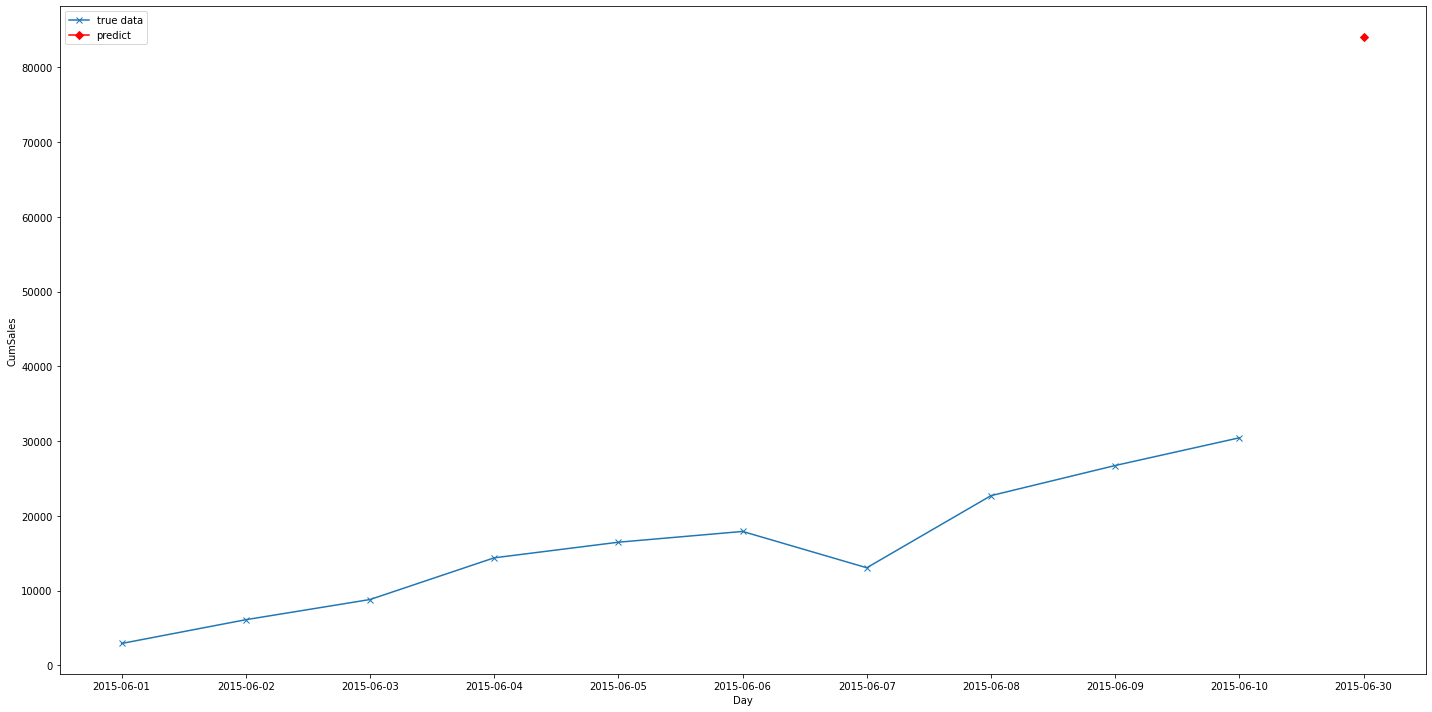

In [12]:
plt.figure(figsize=(20,10))
inverse_d_new(info)
plt.plot(info[1977:1987,0],info[1977:1987,1],marker='x',label='true data')
plt.plot(info[2006,0],pred,marker='D',color='r',label='predict')
plt.legend()
plt.xlabel('Day')
plt.ylabel('CumSales')
plt.tight_layout()
plt.show()

In [13]:
# ProductGroup : G5, Area : A1 ,Channel : C1
# start : 2010-01-02, end : 2022-05-31 
##### month 1 ##### LinearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.linear_model import LinearRegression

x_train = info[:10,0]#10 วัน
y_train = info[:10,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[30,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[30,1]

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
maeLinear = []
mseLinear = []
for i in range (1):
    maeLinear.append(mean_absolute_error([info[30,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[30,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6444955.63030303]
0.9460454486942632


In [14]:
##### month 1 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.neighbors import KNeighborsRegressor

x_train = info[:10,0]#10 วัน
y_train = info[:10,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[30,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[30,1]

maeknr = []
mseknr = []
for i in range (1):
    maeknr.append(mean_absolute_error([info[30,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[30,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1750778.2]
0.8843695731498022


In [15]:
##### month 1 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.tree import DecisionTreeRegressor

x_train = info[:10,0]#10 วัน
y_train = info[:10,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[30,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[30,1]

maetree = []
msetree = []
for i in range (1):
    maetree.append(mean_absolute_error([info[30,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[30,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2182695.]
1.0


In [16]:
##### month 2 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[31:41])
# print(All_Group[A][30:56]) # 30 to 56
from sklearn.linear_model import LinearRegression

x_train = info[31:41,0]#10 วัน
y_train = info[31:41,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[58,1]

for i in range (1):
    maeLinear.append(mean_absolute_error([info[58,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[58,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6143987.16363636]
0.995212653093003


In [17]:
##### month 2 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.neighbors import KNeighborsRegressor

x_train = info[31:41,0]#10 วัน
y_train = info[31:41,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[58,1]

for i in range (1):
    maeknr.append(mean_absolute_error([info[58,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[58,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1780593.6]
0.8650623303551372


In [18]:
##### month 2 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.tree import DecisionTreeRegressor

x_train = info[31:41,0]#10 วัน
y_train = info[31:41,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[58,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[58,1]

for i in range (1):
    maetree.append(mean_absolute_error([info[58,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[58,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2223141.]
1.0


In [19]:
##### month 3 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[59:90])
# print(All_Group[A][30:56]) # 30 to 56
from sklearn.linear_model import LinearRegression 
x_train = info[59:69,0]#10 วัน
y_train = info[59:69,1]
dtree =  LinearRegression   ()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[89,1]
# print(info[89])
# print(info[59:69])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[89,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[89,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[3696525.49090909]
0.22877808650739306


In [20]:
##### month 3 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.neighbors import KNeighborsRegressor

x_train = info[59:69,0]#10 วัน
y_train = info[59:69,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[89,1]

for i in range (1):
    maeknr.append(mean_absolute_error([info[89,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[89,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1583005.8]
0.35617928268965715


In [21]:
##### month 3 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[:30])
# print(All_Group[A][:30]) # 0 to 30
from sklearn.tree import DecisionTreeRegressor

x_train = info[59:69,0]#10 วัน
y_train = info[59:69,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[89,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[89,1]

for i in range (1):
    maetree.append(mean_absolute_error([info[89,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[89,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1964631.]
1.0


In [22]:
##### month 4 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56
from sklearn.linear_model import LinearRegression

x_train = info[90:100,0]#10 วัน
y_train = info[90:100,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[119,1]
# print(info[90:100])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[119,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[119,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[7520217.26060606]
0.9923663618578752


In [23]:
##### month 4 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56
from sklearn.neighbors import KNeighborsRegressor

x_train = info[90:100,0]#10 วัน
y_train = info[90:100,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[119,1]

for i in range (1):
    maeknr.append(mean_absolute_error([info[119,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[119,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1924548.4]
0.8513087716664731


In [24]:
##### month 4 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[90:120])
# print(All_Group[A][30:56]) # 30 to 56
from sklearn.tree import DecisionTreeRegressor

x_train = info[90:100,0]#10 วัน
y_train = info[90:100,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[119,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[119,1]

for i in range (1):
    maetree.append(mean_absolute_error([info[119,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[119,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2550559.]
1.0


In [25]:
##### month 5 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[121:151])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[121:131,0]#10 วัน
y_train = info[121:131,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[150,1]
# print(info[121:131,0])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[150,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[150,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6154829.3090909]
0.9817719805537082


In [26]:
##### month 5 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[121:151])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[121:131,0]#10 วัน
y_train = info[121:131,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[150,1]
# print(info[121:131,0])

for i in range (1):
    maeknr.append(mean_absolute_error([info[150,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[150,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1622484.6]
0.869981266311167


In [27]:
##### month 5 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[121:151])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[121:131,0]#10 วัน
y_train = info[121:131,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[150,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[150,1]
# print(info[121:131,0])

for i in range (1):
    maetree.append(mean_absolute_error([info[150,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[150,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2043028.]
1.0


In [28]:
##### month 6 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[151:181])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[151:161,0]#10 วัน
y_train = info[151:161,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[180,1]
# print(info[180,0])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[180,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[180,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6322524.26666667]
0.9957167199894305


In [29]:
##### month 6 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[151:181])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[151:161,0]#10 วัน
y_train = info[151:161,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[180,1]
# print(info[180,0])

for i in range (1):
    maeknr.append(mean_absolute_error([info[180,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[180,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1674374.2]
0.8623130845348257


In [30]:
##### month 6 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[151:181])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[151:161,0]#10 วัน
y_train = info[151:161,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[180,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[180,1]
# print(info[180,0])

for i in range (1):
    maetree.append(mean_absolute_error([info[180,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[180,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2146500.]
1.0


In [31]:
##### month 7 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[181:212])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[181:191,0]#10 วัน
y_train = info[181:191,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[211,1]
# print(info[211])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[211,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[211,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[7006758.07272728]
0.9931523926712571


In [32]:
##### month 7 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[181:212])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[181:191,0]#10 วัน
y_train = info[181:191,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[211,1]
# print(info[211])

for i in range (1):
    maeknr.append(mean_absolute_error([info[211,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[211,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1778893.0]
0.8598933480768344


In [33]:
##### month 7 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[181:212])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[181:191,0]#10 วัน
y_train = info[181:191,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[211,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[211,1]
# print(info[211])

for i in range (1):
    maetree.append(mean_absolute_error([info[211,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[211,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2351132.]
1.0


In [34]:
##### month 8 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[212:243])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[212:222,0]#10 วัน
y_train = info[212:222,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[242,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[242,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[242,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[7082203.43636364]
0.9963020028752657


In [35]:
##### month 8 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[212:243])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[212:222,0]#10 วัน
y_train = info[212:222,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[242,1]
# print(info[242])

for i in range (1):
    maeknr.append(mean_absolute_error([info[242,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[242,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1826313.8]
0.8507232928911498


In [36]:
##### month 8 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[212:243])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[212:222,0]#10 วัน
y_train = info[212:222,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[242,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[242,1]
# print(info[242])

for i in range (1):
    maetree.append(mean_absolute_error([info[242,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[242,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2341621.]
1.0


In [37]:
##### month 9 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[243:273])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[243:253,0]#10 วัน
y_train = info[243:253,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[272,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[272,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[272,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6419878.85454546]
0.9962758084557758


In [38]:
##### month 9 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[243:273])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[243:253,0]#10 วัน
y_train = info[243:253,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[272,1]
# print(info[242])

for i in range (1):
    maeknr.append(mean_absolute_error([info[272,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[272,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1814434.2]
0.8831718535521239


In [39]:
##### month 9 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[243:273])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[243:253,0]#10 วัน
y_train = info[243:253,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[272,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[272,1]
# print(info[242])

for i in range (1):
    maetree.append(mean_absolute_error([info[272,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[272,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2165515.]
1.0


In [40]:
##### month 10 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[273:304])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[273:283,0]#10 วัน
y_train = info[273:283,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[303,1]
# print(info[242])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[303,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[303,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6980619.19999999]
0.9956977558152011


In [41]:
##### month 10 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[273:304])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[273:283,0]#10 วัน
y_train = info[273:283,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[303,1]
# print(info[242])

for i in range (1):
    maeknr.append(mean_absolute_error([info[303,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[303,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1782049.4]
0.8961052162793801


In [42]:
##### month 10 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[273:304])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[273:283,0]#10 วัน
y_train = info[273:283,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[303,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[303,1]
# print(info[242])

for i in range (1):
    maetree.append(mean_absolute_error([info[303,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[303,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2166359.]
1.0


In [43]:
##### month 11 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[303:334])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[303:313,0]#10 วัน
y_train = info[303:313,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[333,1]
# print(info[333])

for i in range (1):
    maeLinear.append(mean_absolute_error([info[333,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[333,1]],pred))


ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[-2115849.89090909]
0.05764045959799691


In [44]:
##### month 11 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[303:334])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[303:313,0]#10 วัน
y_train = info[303:313,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[333,1]
# print(info[333])

for i in range (1):
    maeknr.append(mean_absolute_error([info[333,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[333,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1605283.4]
0.07728346551398302


In [45]:
##### month 11 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[303:334])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[303:313,0]#10 วัน
y_train = info[303:313,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[333,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[333,1]
# print(info[333])

for i in range (1):
    maetree.append(mean_absolute_error([info[333,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[333,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2029034.]
1.0


In [46]:
##### month 12 ##### linearRegression
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[334:365])
# print(All_Group[A][114:142]) 
from sklearn.linear_model import LinearRegression

x_train = info[334:344,0]#10 วัน
y_train = info[334:344,1]
dtree = LinearRegression()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[364,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[364,1]
# print(info[333])


for i in range (1):
    maeLinear.append(mean_absolute_error([info[364,1]],pred))
for i in range (1):
    mseLinear.append(mean_squared_error([info[364,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[6725651.7090909]
0.9450892806639873


In [47]:
##### month 12 ##### KNeighborsRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[334:365])
# print(All_Group[A][114:142]) 
from sklearn.neighbors import KNeighborsRegressor

x_train = info[334:344,0]#10 วัน
y_train = info[334:344,1]
dtree = KNeighborsRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[364,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[364,1]
# print(info[333])


for i in range (1):
    maeknr.append(mean_absolute_error([info[364,1]],pred))
for i in range (1):
    mseknr.append(mean_squared_error([info[364,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[1850786.6]
0.8343491474970216


In [48]:
##### month 12 ##### DecisionTreeRegressor
A=find_group(5,1,1)
info = find_value_miss(All_Group[A])
# print(info[334:365])
# print(All_Group[A][114:142]) 
from sklearn.tree import DecisionTreeRegressor

x_train = info[334:344,0]#10 วัน
y_train = info[334:344,1]
dtree = DecisionTreeRegressor()
dtree.fit(x_train.reshape(-1,1),y_train)

x = info[364,0]
pred=dtree.predict([[x]])


print(pred)
print(dtree.score(x_train.reshape(-1,1),y_train))
info[364,1]
# print(info[333])

for i in range (1):
    maetree.append(mean_absolute_error([info[364,1]],pred))
for i in range (1):
    msetree.append(mean_squared_error([info[364,1]],pred))

ProductGroup : G5, Area : A1 ,Channel : C1
start : 2010-01-02, end : 2022-05-31 
missing CumSales of invidual day = 269
[2234480.]
1.0


In [50]:
print(maeLinear)
print("-----------------------------------")
print(mseLinear)
print("-----------------------------------")
print(maeknr)
print("-----------------------------------")
print(mseknr)
print("-----------------------------------")
print(maetree)
print("-----------------------------------")
print(msetree)

[490995.3696969701, 295910.1636363631, 2976131.509090909, 995825.2606060617, 97582.69090909511, 83153.73333333433, 206341.07272727787, 361120.43636363745, 396379.14545454085, 74950.19999998808, 9002731.89090909, 4339474.709090903]
-----------------------------------
[241076453063.86435, 87562824943.2992, 8857358759403.73, 991667949661.1306, 9522381565.059994, 6914543367.271276, 42576638294.243774, 130407969559.46393, 157116426951.27206, 5617532480.038213, 81049181499591.58, 18831040750839.582]
-----------------------------------
[5185172.8, 4067483.4, 5089651.2, 4599843.6, 4629927.4, 4731303.8, 5021524.0, 4894769.2, 5001823.8, 5123619.6, 5281598.6, 535390.3999999999]
-----------------------------------
[26886016965859.84, 16544421209275.559, 25904549337661.44, 21158561144460.957, 21436227729270.76, 22385235647894.438, 25215703282576.0, 23958765521268.64, 25018241326246.438, 26251477805504.156, 27895283771521.957, 286642880412.1599]
-----------------------------------
[4753256.0, 362493

In [58]:
meali = np.array(maeLinear)
mseli = np.array(mseLinear)
meakn = np.array(maeknr)
msekn = np.array(mseknr)
meatr = np.array(maetree)
msetr = np.array(msetree)
# print(np.sum(meali))
# print(np.sum(mseli))
# print(np.sum(meakn))
# print(np.sum(meatr))
# print(np.sum(meatr))
# print(np.sum(msetr))

print(np.average(meali))
# print(np.average(mseli))
print(np.average(meakn))
# print(np.average(msekn))
print(np.average(meatr))
# print(np.average(msetr))

#Li

1610049.681818181
4513508.983333333
4063079.8333333335
